In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train_data = pd.read_csv(r"C:\Users\PC\Downloads\train.csv")
test_data = pd.read_csv(r"C:\Users\PC\Downloads\test.csv")

In [16]:
train_data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [17]:
test_data.shape

(2500, 17)

In [18]:
test_data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,7500,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,7501,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,7502,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,7503,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,7504,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [19]:
train_data.shape

(7500, 18)

In [20]:
train_data.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [21]:
test_data.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

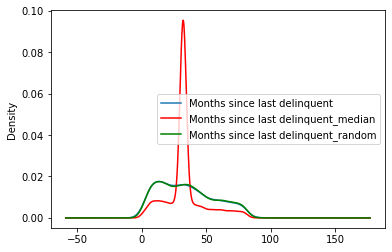

In [22]:
df = train_data.copy()

def random_sample(df,variable,median):
	df[variable+"_median"] = df[variable].fillna(median)
	df[variable+"_random"] = df[variable]
	random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
	random_sample.index = df[df[variable].isnull()].index	
	df.loc[df[variable].isnull(),variable+"_random"] = random_sample
random_sample(df,"Months since last delinquent",df["Months since last delinquent"].median())
fig = plt.figure()
ax = fig.add_subplot(111)
df['Months since last delinquent'].plot(kind='kde', ax=ax)
df["Months since last delinquent_median"].plot(kind='kde', ax=ax, color='red')
df["Months since last delinquent_random"].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:ylabel='Density'>

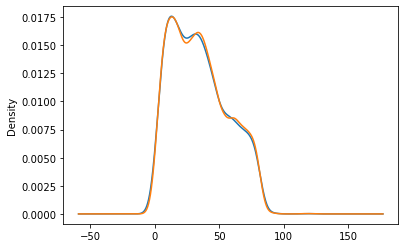

In [23]:
train_data["Months since last delinquent"].plot(kind="kde")
df["Months since last delinquent_random"].plot(kind="kde")

In [24]:
train_data["Months since last delinquent"] = df["Months since last delinquent_random"]

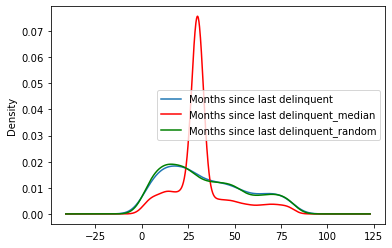

In [25]:
df = test_data.copy()

def random_sample(df,variable,median):
	df[variable+"_median"] = df[variable].fillna(median)
	df[variable+"_random"] = df[variable]
	random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
	random_sample.index = df[df[variable].isnull()].index	
	df.loc[df[variable].isnull(),variable+"_random"] = random_sample
random_sample(df,"Months since last delinquent",df["Months since last delinquent"].median())
fig = plt.figure()
ax = fig.add_subplot(111)
df['Months since last delinquent'].plot(kind='kde', ax=ax)
df["Months since last delinquent_median"].plot(kind='kde', ax=ax, color='red')
df["Months since last delinquent_random"].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:ylabel='Density'>

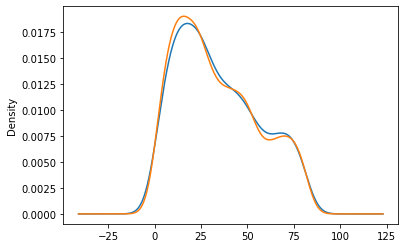

In [26]:
test_data["Months since last delinquent"].plot(kind="kde")
df["Months since last delinquent_random"].plot(kind="kde")

In [27]:
test_data["Months since last delinquent"] = df["Months since last delinquent_random"]

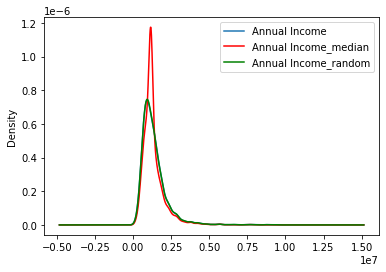

In [28]:
# Annual Income

df = train_data.copy()

def random_sample(df,variable,median):
	df[variable+"_median"] = df[variable].fillna(median)
	df[variable+"_random"] = df[variable]
	random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
	random_sample.index = df[df[variable].isnull()].index	
	df.loc[df[variable].isnull(),variable+"_random"] = random_sample
random_sample(df,"Annual Income",df["Annual Income"].median())
fig = plt.figure()
ax = fig.add_subplot(111)
df['Annual Income'].plot(kind='kde', ax=ax)
df["Annual Income_median"].plot(kind='kde', ax=ax, color='red')
df["Annual Income_random"].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [29]:
train_data['Annual Income'] = df["Annual Income_random"]

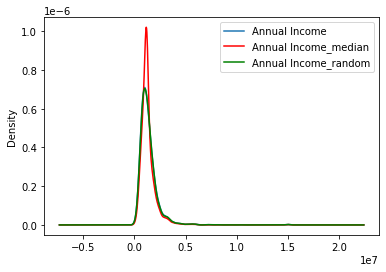

In [30]:
# Annual Income

df = test_data.copy()

def random_sample(df,variable,median):
	df[variable+"_median"] = df[variable].fillna(median)
	df[variable+"_random"] = df[variable]
	random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
	random_sample.index = df[df[variable].isnull()].index	
	df.loc[df[variable].isnull(),variable+"_random"] = random_sample
random_sample(df,"Annual Income",df["Annual Income"].median())
fig = plt.figure()
ax = fig.add_subplot(111)
df['Annual Income'].plot(kind='kde', ax=ax)
df["Annual Income_median"].plot(kind='kde', ax=ax, color='red')
df["Annual Income_random"].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [31]:
test_data['Annual Income'] = df["Annual Income_random"]

In [32]:
train_data["Bankruptcies"].fillna(0.0,inplace=True)

In [33]:
test_data["Bankruptcies"].fillna(0.0,inplace=True)

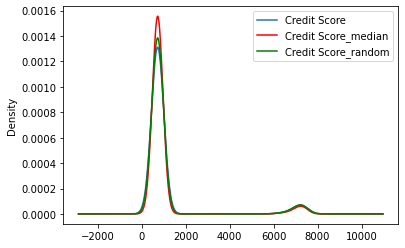

In [34]:

df = train_data.copy()

def random_sample(df,variable,median):
	df[variable+"_median"] = df[variable].fillna(median)
	df[variable+"_random"] = df[variable]
	random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
	random_sample.index = df[df[variable].isnull()].index	
	df.loc[df[variable].isnull(),variable+"_random"] = random_sample
random_sample(df,"Credit Score",df["Credit Score"].median())
fig = plt.figure()
ax = fig.add_subplot(111)
df['Credit Score'].plot(kind='kde', ax=ax)
df["Credit Score_median"].plot(kind='kde', ax=ax, color='red')
df["Credit Score_random"].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [35]:
train_data['Credit Score'] = df["Credit Score_random"]

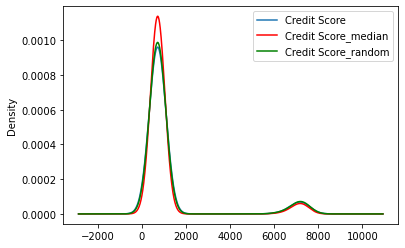

In [36]:
df = test_data.copy()

def random_sample(df,variable,median):
	df[variable+"_median"] = df[variable].fillna(median)
	df[variable+"_random"] = df[variable]
	random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
	random_sample.index = df[df[variable].isnull()].index	
	df.loc[df[variable].isnull(),variable+"_random"] = random_sample
random_sample(df,"Credit Score",df["Credit Score"].median())
fig = plt.figure()
ax = fig.add_subplot(111)
df['Credit Score'].plot(kind='kde', ax=ax)
df["Credit Score_median"].plot(kind='kde', ax=ax, color='red')
df["Credit Score_random"].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [37]:
test_data['Credit Score'] = df["Credit Score_random"]

In [38]:
train_data["Years in current job"].fillna("0 years",inplace=True)

In [39]:
train_data["Years in current job"].unique()

array(['0 years', '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [40]:
train_data["Years in current job_1"] = train_data["Years in current job"].apply(lambda x:x.split(" ")[0])
train_data["Years in current job_1"]

0         0
1       10+
2         8
3         6
4         8
       ... 
7495      <
7496      1
7497      6
7498      0
7499      4
Name: Years in current job_1, Length: 7500, dtype: object

In [41]:
train_data["Years in current job_1"].unique()

array(['0', '10+', '8', '6', '7', '5', '1', '<', '4', '3', '2', '9'],
      dtype=object)

In [42]:
x = train_data["Years in current job_1"]
value_smtg = []
for s in x:
    if s == '10+':
        value_smtg.append("11")
    elif s == "<":
        value_smtg.append("1")
    else:
        value_smtg.append(s)

In [43]:
train_data["Years in current job_1"] = value_smtg
train_data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job_1
0,0,Own Home,482087.0,0 years,0.0,11.0,26.3,685960.0,1.0,37.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,62.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,11
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,10.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,8
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,55.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,6
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,33.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,8


In [44]:
train_data.drop("Years in current job",axis=1,inplace=True)

In [45]:
train_data.head()

,Id,Home Ownership,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job_1
0,0,Own Home,482087.0,0.0,11.0,26.3,685960.0,1.0,37.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0
1,1,Own Home,1025487.0,0.0,15.0,15.3,1181730.0,0.0,62.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,11
2,2,Home Mortgage,751412.0,0.0,11.0,35.0,1182434.0,0.0,10.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,8
3,3,Own Home,805068.0,0.0,8.0,22.5,147400.0,1.0,55.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,6
4,4,Rent,776264.0,0.0,13.0,13.6,385836.0,1.0,33.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,8


In [46]:
df.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Score_median,Credit Score_random
0,7500,Rent,916199.0,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN,731.0,716.0
1,7501,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0,699.0,699.0
2,7502,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,48.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0,7260.0,7260.0
3,7503,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0,739.0,739.0
4,7504,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,16.0,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0,706.0,706.0


In [47]:
train_data.isna().sum()

Id                              0
Home Ownership                  0
Annual Income                   0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
Years in current job_1          0
dtype: int64

In [48]:
test_data.isna().sum()

Id                               0
Home Ownership                   0
Annual Income                    0
Years in current job            86
Tax Liens                        0
Number of Open Accounts          0
Years of Credit History          0
Maximum Open Credit              0
Number of Credit Problems        0
Months since last delinquent     0
Bankruptcies                     0
Purpose                          0
Term                             0
Current Loan Amount              0
Current Credit Balance           0
Monthly Debt                     0
Credit Score                     0
dtype: int64

In [49]:
test_data["Years in current job"].unique()

array(['4 years', '1 year', '3 years', '10+ years', '6 years', '5 years',
       '< 1 year', '2 years', '9 years', '8 years', '7 years', nan],
      dtype=object)

In [50]:
test_data["Years in current job"].fillna("0 years",inplace=True)

test_data["Years in current job_1"] = test_data["Years in current job"].apply(lambda x:x.split(" ")[0])
# test_data["Years in current job_1"]


x = test_data["Years in current job_1"]
value_smtg = []
for s in x:
    if s == '10+':
        value_smtg.append("11")
    elif s == "<":
        value_smtg.append("1")
    else:
        value_smtg.append(s)
        
test_data["Years in current job_1"] = value_smtg
# test_data.head()
        
test_data.drop("Years in current job",axis=1,inplace=True)

In [51]:
test_data.isna().sum()

Id                              0
Home Ownership                  0
Annual Income                   0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Years in current job_1          0
dtype: int64

In [52]:
train_data.isna().sum()

Id                              0
Home Ownership                  0
Annual Income                   0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
Years in current job_1          0
dtype: int64

In [53]:
train_data.dtypes

Id                                int64
Home Ownership                   object
Annual Income                   float64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
Years in current job_1           object
dtype: object

In [54]:
columns_object_train = [col for col in train_data.columns if train_data[col].dtypes == "O"]
columns_object_train

['Home Ownership', 'Purpose', 'Term', 'Years in current job_1']

In [55]:
columns_object_test = [col for col in test_data.columns if test_data[col].dtypes == "O"]
columns_object_test

['Home Ownership', 'Purpose', 'Term', 'Years in current job_1']

In [56]:
for x in columns_object_train:
    print(f'{x} ------ > {len(train_data[x].unique())}')

Home Ownership ------ > 4
Purpose ------ > 15
Term ------ > 2
Years in current job_1 ------ > 11


In [57]:
for x in columns_object_test:
    print(f'{x} ------ > {len(test_data[x].unique())}')

Home Ownership ------ > 4
Purpose ------ > 14
Term ------ > 2
Years in current job_1 ------ > 11


In [58]:
train_data[columns_object_train]

,Home Ownership,Purpose,Term,Years in current job_1
0,Own Home,debt consolidation,Short Term,0
1,Own Home,debt consolidation,Long Term,11
2,Home Mortgage,debt consolidation,Short Term,8
3,Own Home,debt consolidation,Short Term,6
4,Rent,debt consolidation,Short Term,8
...,...,...,...,...
7495,Rent,other,Short Term,1
7496,Home Mortgage,debt consolidation,Long Term,1
7497,Rent,buy a car,Short Term,6
7498,Home Mortgage,debt consolidation,Short Term,0


In [59]:
train_data["Years in current job_1"] = pd.to_numeric(train_data["Years in current job_1"])
test_data["Years in current job_1"] = pd.to_numeric(test_data["Years in current job_1"])

In [60]:
train_data["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [61]:
# Term
val_team = {'Short Term':0,'Long Term':1}
train_data["Term"] = train_data["Term"].map(val_team)
test_data["Term"] = test_data["Term"].map(val_team)

In [62]:
columns_object_train = [col for col in train_data.columns if train_data[col].dtypes == "O"]
columns_object_train

['Home Ownership', 'Purpose']

In [63]:
train_data["Home Ownership"].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

In [64]:
val_home = {'Own Home':0, 'Home Mortgage':1, 'Rent':2, 'Have Mortgage':3}
train_data["Home Ownership"] = train_data["Home Ownership"].map(val_home)
test_data["Home Ownership"] = test_data["Home Ownership"].map(val_home)

In [65]:
columns_object_train = [col for col in train_data.columns if train_data[col].dtypes == "O"]
columns_object_train

['Purpose']

In [66]:
s = train_data["Purpose"].unique()
s

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [67]:
train_data.drop("Purpose",axis=1,inplace=True)
test_data.drop("Purpose",axis=1,inplace=True)

In [68]:
train_data.head()

,Id,Home Ownership,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job_1
0,0,0,482087.0,0.0,11.0,26.3,685960.0,1.0,37.0,1.0,0,99999999.0,47386.0,7914.0,749.0,0,0
1,1,0,1025487.0,0.0,15.0,15.3,1181730.0,0.0,62.0,0.0,1,264968.0,394972.0,18373.0,737.0,1,11
2,2,1,751412.0,0.0,11.0,35.0,1182434.0,0.0,10.0,0.0,0,99999999.0,308389.0,13651.0,742.0,0,8
3,3,0,805068.0,0.0,8.0,22.5,147400.0,1.0,55.0,1.0,0,121396.0,95855.0,11338.0,694.0,0,6
4,4,2,776264.0,0.0,13.0,13.6,385836.0,1.0,33.0,0.0,0,125840.0,93309.0,7180.0,719.0,0,8


In [69]:
test_data.head()

,Id,Home Ownership,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Years in current job_1
0,7500,2,916199.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,0,162470.0,105906.0,6813.0,716.0,4
1,7501,2,231838.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,0,78298.0,46037.0,2318.0,699.0,1
2,7502,1,1152540.0,0.0,10.0,13.7,204600.0,0.0,48.0,0.0,0,200178.0,146490.0,18729.0,7260.0,3
3,7503,1,1220313.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,0,217382.0,213199.0,27559.0,739.0,11
4,7504,1,2340952.0,0.0,11.0,23.6,1207272.0,0.0,16.0,0.0,1,777634.0,425391.0,42605.0,706.0,6


In [70]:
test_data.dtypes

Id                                int64
Home Ownership                    int64
Annual Income                   float64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Term                              int64
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Years in current job_1            int64
dtype: object

In [71]:
train_data.dtypes

Id                                int64
Home Ownership                    int64
Annual Income                   float64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Term                              int64
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
Years in current job_1            int64
dtype: object

In [72]:
train_data.drop("Id",axis=1,inplace=True)

In [73]:
train_data.corr()

,Home Ownership,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job_1
Home Ownership,1.000000,-0.089168,0.007924,-0.090543,-0.162704,-0.006241,0.006428,0.025323,0.011038,-0.085001,-0.016737,-0.142266,-0.129947,0.005003,0.041095,-0.126375
Annual Income,-0.089168,1.000000,0.046994,0.151066,0.145838,0.013965,-0.017830,-0.047130,-0.057181,0.078186,0.026267,0.312061,0.465153,-0.039802,-0.075956,0.106898
Tax Liens,0.007924,0.046994,1.000000,-0.005360,0.009109,-0.002410,0.595339,0.024418,0.057423,0.004953,-0.007835,-0.010195,0.027211,0.012275,0.024368,0.003723
Number of Open Accounts,-0.090543,0.151066,-0.005360,1.000000,0.144819,0.023897,-0.017813,0.009494,-0.018859,0.071316,0.001346,0.267325,0.413904,0.017579,0.028884,0.062628
Years of Credit History,-0.162704,0.145838,0.009109,0.144819,1.000000,0.029247,0.071259,0.002572,0.085592,0.044243,0.010623,0.217856,0.191978,-0.018132,-0.020567,0.159126
Maximum Open Credit,-0.006241,0.013965,-0.002410,0.023897,0.029247,1.000000,-0.004750,-0.005093,-0.011632,-0.006023,-0.002334,0.088090,0.010197,-0.005727,-0.014275,0.004405
Number of Credit Problems,0.006428,-0.017830,0.595339,-0.017813,0.071259,-0.004750,1.000000,0.075703,0.730808,-0.020433,-0.008596,-0.124137,-0.042252,-0.008620,0.020088,0.013963
Months since last delinquent,0.025323,-0.047130,0.024418,0.009494,0.002572,-0.005093,0.075703,1.000000,0.080344,0.010698,-0.002531,-0.009600,-0.013760,-0.020357,-0.008102,-0.025810
Bankruptcies,0.011038,-0.057181,0.057423,-0.018859,0.085592,-0.011632,0.730808,0.080344,1.000000,-0.030981,-0.006169,-0.142553,-0.078847,-0.013173,0.001640,0.023431
Term,-0.085001,0.078186,0.004953,0.071316,0.044243,-0.006023,-0.020433,0.010698,-0.030981,1.000000,-0.075222,0.108561,0.144021,0.029335,0.181487,0.084138


<AxesSubplot:>

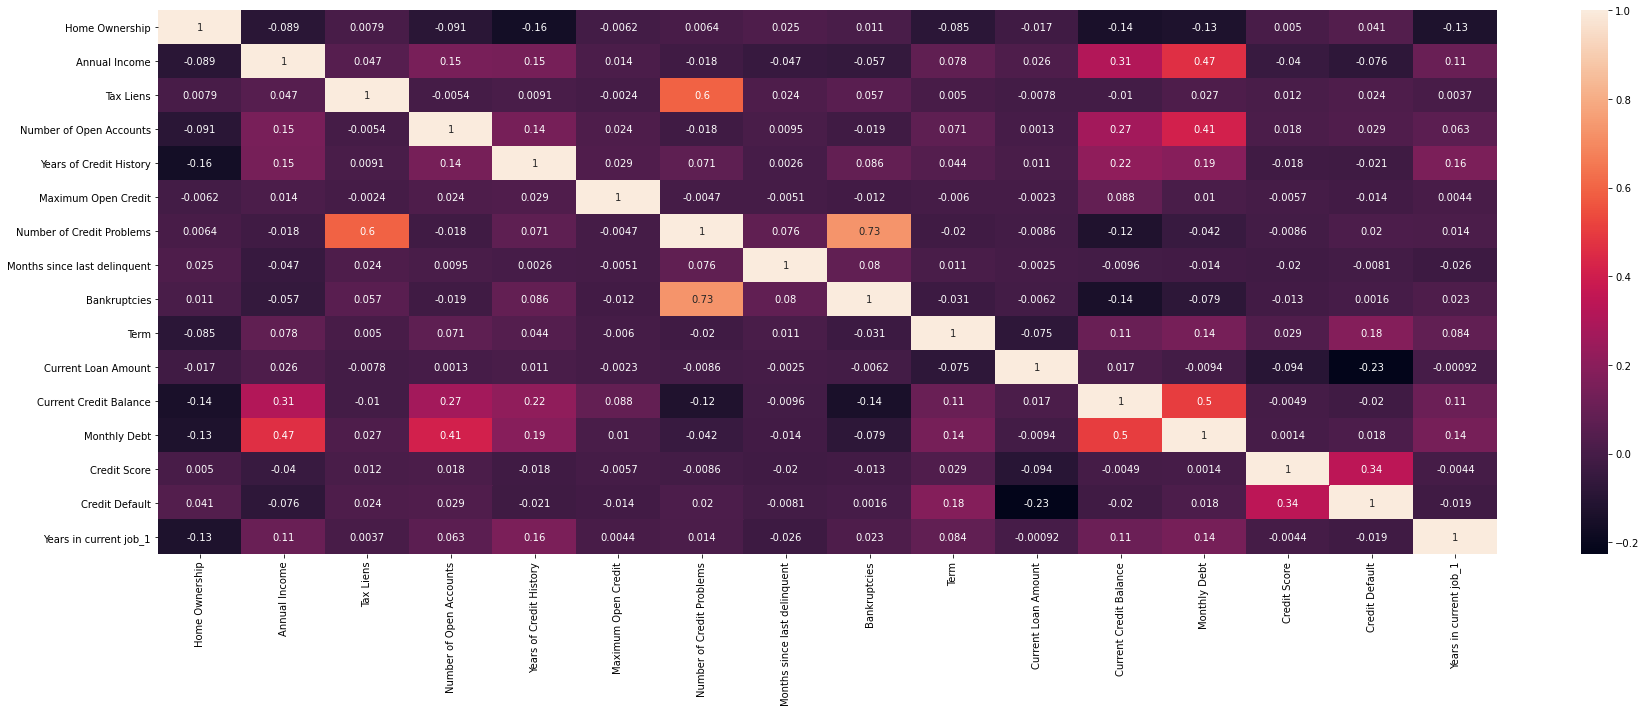

In [74]:
plt.figure(figsize=(30,10))
sns.heatmap(train_data.corr(),annot=True,fmt=".2g")

In [75]:
value_sub = test_data["Id"]

In [76]:
value_sub[:5]

0    7500
1    7501
2    7502
3    7503
4    7504
Name: Id, dtype: int64

In [77]:
test_data = test_data.drop("Id",axis=1)

In [78]:
X_test = test_data.copy()

In [ ]:
# train_data.drop("Id",axis=1)

In [79]:
X = train_data.drop("Credit Default",axis=1)
y = train_data["Credit Default"]

In [80]:
y[:5]

0    0
1    1
2    0
3    0
4    0
Name: Credit Default, dtype: int64

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [82]:
#logisticistic Regression

logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression()

In [83]:
# RandomForestClassifier

random_class = RandomForestClassifier()
random_class.fit(X,y)

RandomForestClassifier()

In [84]:
# DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit(X,y)

DecisionTreeClassifier()

In [85]:
# SVC

svc = SVC()
svc.fit(X,y)

SVC()

In [86]:
y_pred_log = logistic.predict(X_test)
y_pred_log[:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [87]:
y_pred_rc = random_class.predict(X_test)
y_pred_rc[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [88]:
# decision

y_pred_dt = decision.predict(X_test)
y_pred_dt[:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [89]:
y_pred_sv = svc.predict(X_test)
y_pred_sv[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [90]:
data = pd.DataFrame(value_sub)
data["Credit Default"] = y_pred_sv
data.head()

,Id,Credit Default
0,7500,0
1,7501,0
2,7502,0
3,7503,0
4,7504,0
